<h1 align=center><font size = 8> Clustering Neighborhoods in Toronto</font></h1>

<h2 align=center><font size = 5> Final Notebook</font></h2>

<font size = 5> **Author**: Angelo Di Marco

## Introduction

In this Notebook, we perform a cluster segmentation of the neighborhoods in Toronto in terms of the venues categories which are most common in each neighborhood. We use the **Foursquare API** to explore the venues in each neighborhood and then we apply the __*k*-means__ clustering technique to group them into clusters.

**_Note_**: this is the *Final Notebook* submitted for the "week 3 final assignment" of the *Applied Data Science Capstone* course, part of the **IBM Data Science Professional Certificate** issued by [Coursera.org](http://www.coursera.org).

**_Remark_**: notice that in order to have access to the venues of Toronto neighborhoods and then to the main part of this Notebook, a *Foursquare Developer Account* is needed. This provides a Foursquare ID (CLIENT_ID) and a Foursquare Secret (CLIENT_SECRET) which are used to make Foursquare API calls.

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>

1. <a href="#item1">Download/Import and Explore Dataset</a>

2. <a href="#item2">Explore Neighborhoods in Toronto "City Center"</a>

3. <a href="#item3">Analyze Each Neighborhood</a>

4. <a href="#item4">Cluster Neighborhoods</a>

5. <a href="#item5">Examine Clusters</a> 

6. <a href="#item6">Conclusions</a>
    
7. <a href="#item7">Appendices</a> 
</font>
</div>

## Libraries

In [4]:
import numpy as np

import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't installed the package yet
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt


from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium

print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Libraries imported.


--------------------------

<a id='item1'></a>

## 1. Download/Import and Explore Dataset

### Toronto Boroughs and Neighborhoods from Wikipedia

We first download/import the list of boroughs and neighborhoods in Toronto from the Toronto postal codes table available at the Wikipedia page at this [link](https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M). We use *pandas* to convert it into a dataframe:

In [5]:
link = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"

neighborhoods_toronto_wiki = pd.read_html(link)

In [6]:
neighborhoods_toronto_wiki

[    Postal Code           Borough  \
 0           M1A      Not assigned   
 1           M2A      Not assigned   
 2           M3A        North York   
 3           M4A        North York   
 4           M5A  Downtown Toronto   
 5           M6A        North York   
 6           M7A  Downtown Toronto   
 7           M8A      Not assigned   
 8           M9A         Etobicoke   
 9           M1B       Scarborough   
 10          M2B      Not assigned   
 11          M3B        North York   
 12          M4B         East York   
 13          M5B  Downtown Toronto   
 14          M6B        North York   
 15          M7B      Not assigned   
 16          M8B      Not assigned   
 17          M9B         Etobicoke   
 18          M1C       Scarborough   
 19          M2C      Not assigned   
 20          M3C        North York   
 21          M4C         East York   
 22          M5C  Downtown Toronto   
 23          M6C              York   
 24          M7C      Not assigned   
 25         

In [7]:
neighborhoods_toronto_wiki[0]

Postal Code           Borough  \
0           M1A      Not assigned   
1           M2A      Not assigned   
2           M3A        North York   
3           M4A        North York   
4           M5A  Downtown Toronto   
5           M6A        North York   
6           M7A  Downtown Toronto   
7           M8A      Not assigned   
8           M9A         Etobicoke   
9           M1B       Scarborough   
10          M2B      Not assigned   
11          M3B        North York   
12          M4B         East York   
13          M5B  Downtown Toronto   
14          M6B        North York   
15          M7B      Not assigned   
16          M8B      Not assigned   
17          M9B         Etobicoke   
18          M1C       Scarborough   
19          M2C      Not assigned   
20          M3C        North York   
21          M4C         East York   
22          M5C  Downtown Toronto   
23          M6C              York   
24          M7C      Not assigned   
25          M8C      Not assigned   
26          M9C         Etobicoke   
27          M1E       Scarborough   
28          M2E      Not assigned   
29          M3E      Not assigned   
30          M4E      East Toronto   
31          M5E  Downtown Toronto   
32          M6E              York   
33          M7E      Not assigned   
34          M8E      Not assigned   
35          M9E      Not assigned   
36          M1G       Scarborough   
37          M2G      Not assigned   
38          M3G      Not assigned   
39          M4G         East York   
40          M5G  Downtown Toronto   
41          M6G  Downtown Toronto   
42          M7G      Not assigned   
43          M8G      Not assigned   
44          M9G      Not assigned   
45          M1H       Scarborough   
46          M2H        North York   
47          M3H        North York   
48          M4H         East York   
49          M5H  Downtown Toronto   
50          M6H      West Toronto   
51          M7H      Not assigned   
52          M8H      Not assigned   
53          M9H      Not assigned   
54          M1J       Scarborough   
55          M2J        North York   
56          M3J        North York   
57          M4J         East York   
58          M5J  Downtown Toronto   
59          M6J      West Toronto   
60          M7J      Not assigned   
61          M8J      Not assigned   
62          M9J      Not assigned   
63          M1K       Scarborough   
64          M2K        North York   
65          M3K        North York   
66          M4K      East Toronto   
67          M5K  Downtown Toronto   
68          M6K      West Toronto   
69          M7K      Not assigned   
70          M8K      Not assigned   
71          M9K      Not assigned   
72          M1L       Scarborough   
73          M2L        North York   
74          M3L        North York   
75          M4L      East Toronto   
76          M5L  Downtown Toronto   
77          M6L        North York   
78          M7L      Not assigned   
79          M8L      Not assigned   
80          M9L        North York   
81          M1M       Scarborough   
82          M2M        North York   
83          M3M        North York   
84          M4M      East Toronto   
85          M5M        North York   
86          M6M              York   
87          M7M      Not assigned   
88          M8M      Not assigned   
89          M9M        North York   
90          M1N       Scarborough   
91          M2N        North York   
92          M3N        North York   
93          M4N   Central Toronto   
94          M5N   Central Toronto   
95          M6N              York   
96          M7N      Not assigned   
97          M8N      Not assigned   
98          M9N              York   
99          M1P       Scarborough   
100         M2P        North York   
101         M3P      Not assigned   
102         M4P   Central Toronto   
103         M5P   Central Toronto   
104         M6P      West Toronto   
105         M7P      Not assigned   
106         M8P      Not assigned   
107     

In [8]:
neighborhoods_toronto = neighborhoods_toronto_wiki[0]
neighborhoods_toronto.head()

Postal Code           Borough               Neighborhood
0         M1A      Not assigned               Not assigned
1         M2A      Not assigned               Not assigned
2         M3A        North York                  Parkwoods
3         M4A        North York           Victoria Village
4         M5A  Downtown Toronto  Regent Park, Harbourfront

In [9]:
neighborhoods_toronto.shape

(180, 3)

We remove from the dataframe the rows which have a *Not assigned* borough

In [10]:
neighborhoods_toronto = neighborhoods_toronto[neighborhoods_toronto['Borough']!='Not assigned']
neighborhoods_toronto

Postal Code           Borough  \
2           M3A        North York   
3           M4A        North York   
4           M5A  Downtown Toronto   
5           M6A        North York   
6           M7A  Downtown Toronto   
8           M9A         Etobicoke   
9           M1B       Scarborough   
11          M3B        North York   
12          M4B         East York   
13          M5B  Downtown Toronto   
14          M6B        North York   
17          M9B         Etobicoke   
18          M1C       Scarborough   
20          M3C        North York   
21          M4C         East York   
22          M5C  Downtown Toronto   
23          M6C              York   
26          M9C         Etobicoke   
27          M1E       Scarborough   
30          M4E      East Toronto   
31          M5E  Downtown Toronto   
32          M6E              York   
36          M1G       Scarborough   
39          M4G         East York   
40          M5G  Downtown Toronto   
41          M6G  Downtown Toronto   
45          M1H       Scarborough   
46          M2H        North York   
47          M3H        North York   
48          M4H         East York   
49          M5H  Downtown Toronto   
50          M6H      West Toronto   
54          M1J       Scarborough   
55          M2J        North York   
56          M3J        North York   
57          M4J         East York   
58          M5J  Downtown Toronto   
59          M6J      West Toronto   
63          M1K       Scarborough   
64          M2K        North York   
65          M3K        North York   
66          M4K      East Toronto   
67          M5K  Downtown Toronto   
68          M6K      West Toronto   
72          M1L       Scarborough   
73          M2L        North York   
74          M3L        North York   
75          M4L      East Toronto   
76          M5L  Downtown Toronto   
77          M6L        North York   
80          M9L        North York   
81          M1M       Scarborough   
82          M2M        North York   
83          M3M        North York   
84          M4M      East Toronto   
85          M5M        North York   
86          M6M              York   
89          M9M        North York   
90          M1N       Scarborough   
91          M2N        North York   
92          M3N        North York   
93          M4N   Central Toronto   
94          M5N   Central Toronto   
95          M6N              York   
98          M9N              York   
99          M1P       Scarborough   
100         M2P        North York   
102         M4P   Central Toronto   
103         M5P   Central Toronto   
104         M6P      West Toronto   
107         M9P         Etobicoke   
108         M1R       Scarborough   
109         M2R        North York   
111         M4R   Central Toronto   
112         M5R   Central Toronto   
113         M6R      West Toronto   
114         M7R       Mississauga   
116         M9R         Etobicoke   
117         M1S       Scarborough   
120         M4S   Central Toronto   
121         M5S  Downtown Toronto   
122         M6S      West Toronto   
126         M1T       Scarborough   
129         M4T   Central Toronto   
130         M5T  Downtown Toronto   
135         M1V       Scarborough   
138         M4V   Central Toronto   
139         M5V  Downtown Toronto   
142         M8V         Etobicoke   
143         M9V         Etobicoke   
144         M1W       Scarborough   
147         M4W  Downtown Toronto   
148         M5W  Downtown Toronto   
151         M8W         Etobicoke   
152         M9W         Etobicoke   
153         M1X       Scarborough   
156         M4X  Downtown Toronto   
157         M5X  Downtown Toronto   
160         M8X         Etobicoke   
165         M4Y  Downtown Toronto   
168         M7Y      East Toronto   
169         M8Y         Etobicoke   
178         M8Z         Etobicoke   

                                          Neighborhood  
2                                            Parkwoods  
3                                     Vic

In [11]:
neighborhoods_toronto.shape

(103, 3)

and we reset the index of the dataframe

In [12]:
neighborhoods_toronto.reset_index(drop=True, inplace=True)
neighborhoods_toronto

Postal Code           Borough  \
0           M3A        North York   
1           M4A        North York   
2           M5A  Downtown Toronto   
3           M6A        North York   
4           M7A  Downtown Toronto   
5           M9A         Etobicoke   
6           M1B       Scarborough   
7           M3B        North York   
8           M4B         East York   
9           M5B  Downtown Toronto   
10          M6B        North York   
11          M9B         Etobicoke   
12          M1C       Scarborough   
13          M3C        North York   
14          M4C         East York   
15          M5C  Downtown Toronto   
16          M6C              York   
17          M9C         Etobicoke   
18          M1E       Scarborough   
19          M4E      East Toronto   
20          M5E  Downtown Toronto   
21          M6E              York   
22          M1G       Scarborough   
23          M4G         East York   
24          M5G  Downtown Toronto   
25          M6G  Downtown Toronto   
26          M1H       Scarborough   
27          M2H        North York   
28          M3H        North York   
29          M4H         East York   
30          M5H  Downtown Toronto   
31          M6H      West Toronto   
32          M1J       Scarborough   
33          M2J        North York   
34          M3J        North York   
35          M4J         East York   
36          M5J  Downtown Toronto   
37          M6J      West Toronto   
38          M1K       Scarborough   
39          M2K        North York   
40          M3K        North York   
41          M4K      East Toronto   
42          M5K  Downtown Toronto   
43          M6K      West Toronto   
44          M1L       Scarborough   
45          M2L        North York   
46          M3L        North York   
47          M4L      East Toronto   
48          M5L  Downtown Toronto   
49          M6L        North York   
50          M9L        North York   
51          M1M       Scarborough   
52          M2M        North York   
53          M3M        North York   
54          M4M      East Toronto   
55          M5M        North York   
56          M6M              York   
57          M9M        North York   
58          M1N       Scarborough   
59          M2N        North York   
60          M3N        North York   
61          M4N   Central Toronto   
62          M5N   Central Toronto   
63          M6N              York   
64          M9N              York   
65          M1P       Scarborough   
66          M2P        North York   
67          M4P   Central Toronto   
68          M5P   Central Toronto   
69          M6P      West Toronto   
70          M9P         Etobicoke   
71          M1R       Scarborough   
72          M2R        North York   
73          M4R   Central Toronto   
74          M5R   Central Toronto   
75          M6R      West Toronto   
76          M7R       Mississauga   
77          M9R         Etobicoke   
78          M1S       Scarborough   
79          M4S   Central Toronto   
80          M5S  Downtown Toronto   
81          M6S      West Toronto   
82          M1T       Scarborough   
83          M4T   Central Toronto   
84          M5T  Downtown Toronto   
85          M1V       Scarborough   
86          M4V   Central Toronto   
87          M5V  Downtown Toronto   
88          M8V         Etobicoke   
89          M9V         Etobicoke   
90          M1W       Scarborough   
91          M4W  Downtown Toronto   
92          M5W  Downtown Toronto   
93          M8W         Etobicoke   
94          M9W         Etobicoke   
95          M1X       Scarborough   
96          M4X  Downtown Toronto   
97          M5X  Downtown Toronto   
98          M8X         Etobicoke   
99          M4Y  Downtown Toronto   
100         M7Y      East Toronto   
101         M8Y         Etobicoke   
102         M8Z         Etobicoke   

                                          Neighborhood  
0                                            Parkwoods  
1                                     Vic

We check also if there are rows with a *Not assigned* neighborhood

In [13]:
neighborhoods_toronto[neighborhoods_toronto['Neighborhood']=='Not assigned'].count()

Postal Code     0
Borough         0
Neighborhood    0
dtype: int64

but we see that a name is assigned to all neighborhoods in the dataset. We finally check the shape of the dataframe:

In [14]:
neighborhoods_toronto.shape

(103, 3)

### Adding Neighborhoods Coordinates

We now use the Geocoder Python package to get latitude and longitude of every neighborhood in Toronto based on the corresponding postal code. We first install and import Geocoder:

In [15]:
!conda install -c conda-forge geocoder --yes # uncomment this line if you haven't installed the package yet
import geocoder # import geocoder

Solving environment: done

# All requested packages already installed.



Then we get the coodinates of each neighborhood using Geocoder:

In [16]:
lat_lng_coords = None
postal_code = 'M3A'

# # loop until you get the coordinates
# while(lat_lng_coords is None):
#     g = geocoder.google('{}, Toronto, Ontario'.format(postal_code))
#     lat_lng_coords = g.latlng

# loop until you get the coordinates
while(lat_lng_coords is None):
    g = geocoder.osm('{}, Toronto, Ontario'.format(postal_code))
    lat_lng_coords = g.latlng

# g = geocoder.osm('{}, Toronto, Ontario'.format(postal_code))
# lat_lng_coords = g.latlng
    
latitude = lat_lng_coords[0]
longitude = lat_lng_coords[1]

In [17]:
latitude

43.6534817

**Note**: unfortunately Geocoder seems not working properly. It gives a *None* result for several postal codes even after calling the function using a loop function. Switching between Google and OpenStreetMap does not help.

Instead, we load the neighborhoods coordinates from the csv file available at the [link](https://cocl.us/Geospatial_data):

In [18]:
coordinates_neighborhoods = pd.read_csv('Geospatial_Coordinates.csv')
coordinates_neighborhoods.head()

Postal Code   Latitude  Longitude
0         M1B  43.806686 -79.194353
1         M1C  43.784535 -79.160497
2         M1E  43.763573 -79.188711
3         M1G  43.770992 -79.216917
4         M1H  43.773136 -79.239476

We finally merge this dataframe containing the coordinates with the dataframe of Toronto neighborhoods

In [19]:
neighborhoods_toronto_coord = pd.merge(neighborhoods_toronto, coordinates_neighborhoods, how='left', on=['Postal Code'])
neighborhoods_toronto_coord

Postal Code           Borough  \
0           M3A        North York   
1           M4A        North York   
2           M5A  Downtown Toronto   
3           M6A        North York   
4           M7A  Downtown Toronto   
5           M9A         Etobicoke   
6           M1B       Scarborough   
7           M3B        North York   
8           M4B         East York   
9           M5B  Downtown Toronto   
10          M6B        North York   
11          M9B         Etobicoke   
12          M1C       Scarborough   
13          M3C        North York   
14          M4C         East York   
15          M5C  Downtown Toronto   
16          M6C              York   
17          M9C         Etobicoke   
18          M1E       Scarborough   
19          M4E      East Toronto   
20          M5E  Downtown Toronto   
21          M6E              York   
22          M1G       Scarborough   
23          M4G         East York   
24          M5G  Downtown Toronto   
25          M6G  Downtown Toronto   
26          M1H       Scarborough   
27          M2H        North York   
28          M3H        North York   
29          M4H         East York   
30          M5H  Downtown Toronto   
31          M6H      West Toronto   
32          M1J       Scarborough   
33          M2J        North York   
34          M3J        North York   
35          M4J         East York   
36          M5J  Downtown Toronto   
37          M6J      West Toronto   
38          M1K       Scarborough   
39          M2K        North York   
40          M3K        North York   
41          M4K      East Toronto   
42          M5K  Downtown Toronto   
43          M6K      West Toronto   
44          M1L       Scarborough   
45          M2L        North York   
46          M3L        North York   
47          M4L      East Toronto   
48          M5L  Downtown Toronto   
49          M6L        North York   
50          M9L        North York   
51          M1M       Scarborough   
52          M2M        North York   
53          M3M        North York   
54          M4M      East Toronto   
55          M5M        North York   
56          M6M              York   
57          M9M        North York   
58          M1N       Scarborough   
59          M2N        North York   
60          M3N        North York   
61          M4N   Central Toronto   
62          M5N   Central Toronto   
63          M6N              York   
64          M9N              York   
65          M1P       Scarborough   
66          M2P        North York   
67          M4P   Central Toronto   
68          M5P   Central Toronto   
69          M6P      West Toronto   
70          M9P         Etobicoke   
71          M1R       Scarborough   
72          M2R        North York   
73          M4R   Central Toronto   
74          M5R   Central Toronto   
75          M6R      West Toronto   
76          M7R       Mississauga   
77          M9R         Etobicoke   
78          M1S       Scarborough   
79          M4S   Central Toronto   
80          M5S  Downtown Toronto   
81          M6S      West Toronto   
82          M1T       Scarborough   
83          M4T   Central Toronto   
84          M5T  Downtown Toronto   
85          M1V       Scarborough   
86          M4V   Central Toronto   
87          M5V  Downtown Toronto   
88          M8V         Etobicoke   
89          M9V         Etobicoke   
90          M1W       Scarborough   
91          M4W  Downtown Toronto   
92          M5W  Downtown Toronto   
93          M8W         Etobicoke   
94          M9W         Etobicoke   
95          M1X       Scarborough   
96          M4X  Downtown Toronto   
97          M5X  Downtown Toronto   
98          M8X         Etobicoke   
99          M4Y  Downtown Toronto   
100         M7Y      East Toronto   
101         M8Y         Etobicoke   
102         M8Z         Etobicoke   

                                          Neighborhood   Latitude  Longitude  
0                                            Parkwoods  43.753259 -79.329656

In [20]:
neighborhoods_toronto_coord.shape

(103, 5)

In [21]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods_toronto_coord['Borough'].unique()),
        neighborhoods_toronto_coord.shape[0]
    )
)

The dataframe has 10 boroughs and 103 neighborhoods.


### Map of Toronto Neighborhoods

We get the latitude and longitude of Toronto using the Geopy library

In [22]:
address = 'Toronto, Ontario'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


and we create a map of Toronto with the neighborhoods. Click on the blue markers to get a popup with the name of the neighborhood together with the corresponding borough.

In [23]:
# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods_toronto_coord['Latitude'], neighborhoods_toronto_coord['Longitude'], neighborhoods_toronto_coord['Borough'], neighborhoods_toronto_coord['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

### Map of Toronto Neighborhoods - "City Center"

Let us focus for instance on the boroughs of the "city center" namely the ones containing the word *Toronto*

In [24]:
center_toronto = neighborhoods_toronto_coord[neighborhoods_toronto_coord['Borough'].str.contains("Toronto")].reset_index(drop=True)
center_toronto.head()

Postal Code           Borough                                 Neighborhood  \
0         M5A  Downtown Toronto                    Regent Park, Harbourfront   
1         M7A  Downtown Toronto  Queen's Park, Ontario Provincial Government   
2         M5B  Downtown Toronto                     Garden District, Ryerson   
3         M5C  Downtown Toronto                               St. James Town   
4         M4E      East Toronto                                  The Beaches   

    Latitude  Longitude  
0  43.654260 -79.360636  
1  43.662301 -79.389494  
2  43.657162 -79.378937  
3  43.651494 -79.375418  
4  43.676357 -79.293031

In [25]:
center_toronto.shape

(39, 5)

and we create a new map

In [26]:
# create map of Toronto using latitude and longitude values
map_toronto_center = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, borough, neighborhood in zip(center_toronto['Latitude'], center_toronto['Longitude'], center_toronto['Borough'], center_toronto['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto_center)  
    
map_toronto_center

**Note**: in the following we will focus on the "city center" neighborhoods

-------------------

### Foursquare Credentials and Version

In [1]:
CLIENT_ID = '<your-ID>' # your Foursquare ID
CLIENT_SECRET = '<your-Secret>' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: <your-ID>
CLIENT_SECRET:<your-Secret>


### Exploring the first neighborhood in Toronto dataframe

We have a look at the first neighborhood in the Toronto dataframe of the "city center":

In [28]:
center_toronto.loc[0, 'Neighborhood']

'Regent Park, Harbourfront'

In [29]:
neighborhood_latitude = center_toronto.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = center_toronto.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = center_toronto.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Regent Park, Harbourfront are 43.6542599, -79.3606359.


### Top 100 venues within a radius of 500 meters of first neighborhood in Toronto dataframe

We build the URL to make a call of the Foursquare API

In [30]:
radius = 500
LIMIT = 100
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, neighborhood_latitude, neighborhood_longitude, VERSION, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?client_id=MWGEKSE44E1PK4GITW5U5OU30V3BKBGXHCRLX0BCTJ54N5UF&client_secret=IIDVFRYRVPKJMALK5TOVPDRDCQPKJDBUIG0SSEEPDRBOXEWD&ll=43.6542599,-79.3606359&v=20180605&radius=500&limit=100'

We send the GET request and examine the results

In [31]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5efb3b81587699312d5ddb71'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Corktown',
  'headerFullLocation': 'Corktown, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 45,
  'suggestedBounds': {'ne': {'lat': 43.6587599045, 'lng': -79.3544279001486},
   'sw': {'lat': 43.6497598955, 'lng': -79.36684389985142}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '54ea41ad498e9a11e9e13308',
       'name': 'Roselle Desserts',
       'location': {'address': '362 King St E',
        'crossStreet': 'Trinity St',
        'lat': 43.653446723052674,
        'lng': -79.3620167174383,
        'labeledLatLngs': [{'label': 'display',
 

All the information about the venues is in the *items* key. Before we proceed, we define the **get_category_type** function that we will use to access to the categories types of the returned venues

In [32]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Now we are ready to clean the json and structure it into a *pandas* dataframe to explore the venues in the first neighborhood.

In [33]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head(20)

/Users/Angelo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


name             categories        lat  \
0                       Roselle Desserts                 Bakery  43.653447   
1                          Tandem Coffee            Coffee Shop  43.653559   
2                 Cooper Koo Family YMCA    Distribution Center  43.653249   
3                    Body Blitz Spa East                    Spa  43.654735   
4               Dominion Pub and Kitchen                    Pub  43.656919   
5                        Corktown Common                   Park  43.655618   
6                         Impact Kitchen             Restaurant  43.656369   
7                     Morning Glory Cafe         Breakfast Spot  43.653947   
8                     The Extension Room   Gym / Fitness Center  43.653313   
9       The Distillery Historic District          Historic Site  43.650244   
10              Distillery Sunday Market         Farmers Market  43.650075   
11                Figs Breakfast & Lunch         Breakfast Spot  43.655675   
12                       Sumach Espresso            Coffee Shop  43.658135   
13                                  Arvo            Coffee Shop  43.649963   
14  Young Centre for the Performing Arts  Performing Arts Venue  43.650825   
15                        Rooster Coffee            Coffee Shop  43.651900   
16                             Starbucks            Coffee Shop  43.651613   
17                   SOMA chocolatemaker         Chocolate Shop  43.650622   
18                        Underpass Park                   Park  43.655764   
19                              Cacao 70           Dessert Shop  43.650067   

          lng  
0  -79.362017  
1  -79.361809  
2  -79.358008  
3  -79.359874  
4  -79.358967  
5  -79.356211  
6  -79.356980  
7  -79.361149  
8  -79.359725  
9  -79.359323  
10 -79.361832  
11 -79.364503  
12 -79.359515  
13 -79.361442  
14 -79.357593  
15 -79.365609  
16 -79.364917  
17 -79.358127  
18 -79.354806  
19 -79.360723

And how many venues were returned by Foursquare?

In [34]:
print('{} venues were returned by Foursquare of the first neighborhood.'.format(nearby_venues.shape[0]))

45 venues were returned by Foursquare of the first neighborhood.


------------------

<a id='item2'></a>

## 2. Explore Neighborhoods in Toronto "City Center"

We define here the following function to repeat the previous process to all the neighborhoods in Toronto "city center"

In [35]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Now we run the above function on each neighborhood and create a new dataframe which collects all the venues

In [36]:
center_toronto_venues = getNearbyVenues(names=center_toronto['Neighborhood'],
                                   latitudes=center_toronto['Latitude'],
                                   longitudes=center_toronto['Longitude']
                                  )

Regent Park, Harbourfront
Queen's Park, Ontario Provincial Government
Garden District, Ryerson
St. James Town
The Beaches
Berczy Park
Central Bay Street
Christie
Richmond, Adelaide, King
Dufferin, Dovercourt Village
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
The Danforth West, Riverdale
Toronto Dominion Centre, Design Exchange
Brockton, Parkdale Village, Exhibition Place
India Bazaar, The Beaches West
Commerce Court, Victoria Hotel
Studio District
Lawrence Park
Roselawn
Davisville North
Forest Hill North & West, Forest Hill Road Park
High Park, The Junction South
North Toronto West, Lawrence Park
The Annex, North Midtown, Yorkville
Parkdale, Roncesvalles
Davisville
University of Toronto, Harbord
Runnymede, Swansea
Moore Park, Summerhill East
Kensington Market, Chinatown, Grange Park
Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park
CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport
R

and we explore the resulting dataframe

In [37]:
print(center_toronto_venues.shape)
center_toronto_venues.head()

(1622, 7)


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0  Regent Park, Harbourfront               43.65426              -79.360636   
1  Regent Park, Harbourfront               43.65426              -79.360636   
2  Regent Park, Harbourfront               43.65426              -79.360636   
3  Regent Park, Harbourfront               43.65426              -79.360636   
4  Regent Park, Harbourfront               43.65426              -79.360636   

                      Venue  Venue Latitude  Venue Longitude  \
0          Roselle Desserts       43.653447       -79.362017   
1             Tandem Coffee       43.653559       -79.361809   
2    Cooper Koo Family YMCA       43.653249       -79.358008   
3       Body Blitz Spa East       43.654735       -79.359874   
4  Dominion Pub and Kitchen       43.656919       -79.358967   

        Venue Category  
0               Bakery  
1          Coffee Shop  
2  Distribution Center  
3                  Spa  
4                  Pub

Let's check how many venues were returned for each neighborhood

In [38]:
center_toronto_venues.groupby('Neighborhood').count()

Neighborhood Latitude  \
Neighborhood                                                                
Berczy Park                                                            58   
Brockton, Parkdale Village, Exhibition Place                           24   
Business reply mail Processing Centre, South Ce...                     17   
CN Tower, King and Spadina, Railway Lands, Harb...                     17   
Central Bay Street                                                     65   
Christie                                                               16   
Church and Wellesley                                                   77   
Commerce Court, Victoria Hotel                                        100   
Davisville                                                             35   
Davisville North                                                        8   
Dufferin, Dovercourt Village                                           14   
First Canadian Place, Underground city                                100   
Forest Hill North & West, Forest Hill Road Park                         4   
Garden District, Ryerson                                              100   
Harbourfront East, Union Station, Toronto Islands                     100   
High Park, The Junction South                                          24   
India Bazaar, The Beaches West                                         24   
Kensington Market, Chinatown, Grange Park                              59   
Lawrence Park                                                           3   
Little Portugal, Trinity                                               44   
Moore Park, Summerhill East                                             2   
North Toronto West, Lawrence Park                                      19   
Parkdale, Roncesvalles                                                 15   
Queen's Park, Ontario Provincial Government                            33   
Regent Park, Harbourfront                                              45   
Richmond, Adelaide, King                                               94   
Rosedale                                                                4   
Roselawn                                                                2   
Runnymede, Swansea                                                     37   
St. James Town                                                         80   
St. James Town, Cabbagetown                                            44   
Stn A PO Boxes                                                         97   
Studio District                                                        40   
Summerhill West, Rathnelly, South Hill, Forest ...                     16   
The Annex, North Midtown, Yorkville                                    23   
The Beaches                                                             4   
The Danforth West, Riverdale                                           43   
Toronto Dominion Centre, Design Exchange                              100   
University of Toronto, Harbord                                         35   

                                                    Neighborhood Longitude  \
Neighborhood                                                                 
Berczy Park                                                             58   
Brockton, Parkdale Village, Exhibition Place                            24   
Business reply mail Processing Centre, South Ce...                      17   
CN Tower, King and Spadina, Railway Lands, Harb...                      17   
Central Bay Street                                                      65   
Christie                                                                16   
Church and Wellesley                                                    77   
Commerce Court, Victoria Hotel                                         100   
Davisville                                                              35   
Davisville North                    

How many unique categories can be curated from all the returned venues ?

In [39]:
print('There are {} uniques categories.'.format(len(center_toronto_venues['Venue Category'].unique())))

There are 233 uniques categories.


-----------------

<a id='item3'></a>

## 3. Analyze Each Neighborhood

In order to analyze each neighborhood, we start by applying the **One Hot Encoding**

In [40]:
# one hot encoding
center_toronto_onehot = pd.get_dummies(center_toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
center_toronto_onehot['Neighborhood'] = center_toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [center_toronto_onehot.columns[-1]] + list(center_toronto_onehot.columns[:-1])
center_toronto_onehot = center_toronto_onehot[fixed_columns]

center_toronto_onehot.head()

Yoga Studio  Afghan Restaurant  Airport  Airport Food Court  Airport Gate  \
0            0                  0        0                   0             0   
1            0                  0        0                   0             0   
2            0                  0        0                   0             0   
3            0                  0        0                   0             0   
4            0                  0        0                   0             0   

   Airport Lounge  Airport Service  Airport Terminal  American Restaurant  \
0               0                0                 0                    0   
1               0                0                 0                    0   
2               0                0                 0                    0   
3               0                0                 0                    0   
4               0                0                 0                    0   

   Antique Shop  Aquarium  Art Gallery  Art Museum  Arts & Crafts Store  \
0             0         0            0           0                    0   
1             0         0            0           0                    0   
2             0         0            0           0                    0   
3             0         0            0           0                    0   
4             0         0            0           0                    0   

   Asian Restaurant  Auto Workshop  BBQ Joint  Baby Store  Bagel Shop  Bakery  \
0                 0              0          0           0           0       1   
1                 0              0          0           0           0       0   
2                 0              0          0           0           0       0   
3                 0              0          0           0           0       0   
4                 0              0          0           0           0       0   

   Bank  Bar  Baseball Stadium  Basketball Stadium  Beach  Bed & Breakfast  \
0     0    0                 0                   0      0                0   
1     0    0                 0                   0      0                0   
2     0    0                 0                   0      0                0   
3     0    0                 0                   0      0                0   
4     0    0                 0                   0      0                0   

   Beer Bar  Beer Store  Belgian Restaurant  Bistro  Boat or Ferry  Bookstore  \
0         0           0                   0       0              0          0   
1         0           0                   0       0              0          0   
2         0           0                   0       0              0          0   
3         0           0                   0       0              0          0   
4         0           0                   0       0              0          0   

   Boutique  Brazilian Restaurant  Breakfast Spot  Brewery  Bubble Tea Shop  \
0         0                     0               0        0                0   
1         0                     0               0        0                0   
2         0                     0               0        0                0   
3         0                     0               0        0                0   
4         0                     0               0        0                0   

   Building  Burger Joint  Burrito Place  Bus Line  Butcher  Café  \
0         0             0              0         0        0     0   
1         0             0              0         0        0     0   
2         0             0              0         0        0     0   
3         0             0              0         0        0     0   
4         0             0              0         0        0     0   

   Cajun / Creole Restaurant  Camera Store  Candy Store  Caribbean Restaurant  \
0                          0             0            0                     0   
1                          0             0            0                     0   
2                          0    

In [41]:
center_toronto_onehot.shape

(1622, 233)

Next, we group the rows by neighborhood and we calculate the mean of the frequency of occurrence of each category

In [42]:
center_toronto_grouped = center_toronto_onehot.groupby('Neighborhood').mean().reset_index()
center_toronto_grouped

Neighborhood  Yoga Studio  \
0                                         Berczy Park     0.000000   
1        Brockton, Parkdale Village, Exhibition Place     0.000000   
2   Business reply mail Processing Centre, South C...     0.058824   
3   CN Tower, King and Spadina, Railway Lands, Har...     0.000000   
4                                  Central Bay Street     0.015385   
5                                            Christie     0.000000   
6                                Church and Wellesley     0.025974   
7                      Commerce Court, Victoria Hotel     0.000000   
8                                          Davisville     0.000000   
9                                    Davisville North     0.000000   
10                       Dufferin, Dovercourt Village     0.000000   
11             First Canadian Place, Underground city     0.000000   
12    Forest Hill North & West, Forest Hill Road Park     0.000000   
13                           Garden District, Ryerson     0.000000   
14  Harbourfront East, Union Station, Toronto Islands     0.000000   
15                      High Park, The Junction South     0.000000   
16                     India Bazaar, The Beaches West     0.000000   
17          Kensington Market, Chinatown, Grange Park     0.000000   
18                                      Lawrence Park     0.000000   
19                           Little Portugal, Trinity     0.022727   
20                        Moore Park, Summerhill East     0.000000   
21                  North Toronto West, Lawrence Park     0.052632   
22                             Parkdale, Roncesvalles     0.000000   
23        Queen's Park, Ontario Provincial Government     0.030303   
24                          Regent Park, Harbourfront     0.022222   
25                           Richmond, Adelaide, King     0.000000   
26                                           Rosedale     0.000000   
27                                           Roselawn     0.000000   
28                                 Runnymede, Swansea     0.027027   
29                                     St. James Town     0.000000   
30                        St. James Town, Cabbagetown     0.000000   
31                                     Stn A PO Boxes     0.010309   
32                                    Studio District     0.025000   
33  Summerhill West, Rathnelly, South Hill, Forest...     0.000000   
34                The Annex, North Midtown, Yorkville     0.000000   
35                                        The Beaches     0.000000   
36                       The Danforth West, Riverdale     0.023256   
37           Toronto Dominion Centre, Design Exchange     0.000000   
38                     University of Toronto, Harbord     0.028571   

    Afghan Restaurant   Airport  Airport Food Court  Airport Gate  \
0            0.000000  0.000000            0.000000      0.000000   
1            0.000000  0.000000            0.000000      0.000000   
2            0.000000  0.000000            0.000000      0.000000   
3            0.000000  0.058824            0.058824      0.058824   
4            0.000000  0.000000            0.000000      0.000000   
5            0.000000  0.000000            0.000000      0.000000   
6            0.012987  0.000000            0.000000      0.000000   
7            0.000000  0.000000            0.000000      0.000000   
8            0.000000  0.000000            0.000000      0.000000   
9            0.000000  0.000000            0.000000      0.000000   
10           0.000000  0.000000            0.000000      0.000000   
11           0.000000  0.000000            0.000000      0.000000   
12           0.000000  0.000000            0.000000      0.000000   
13           0.000000  0.000000            0.000000      0.000000   
14           0.000000  0.000000            0.000000      0.000000   
15           0.000000  0.000000            0.000000      0.000000   
16           0.000000  0.000000            0.000000      0.000000  

In [43]:
center_toronto_grouped.shape

(39, 233)

Let us print each neighborhood along with the top 5 most common venues:

In [44]:
num_top_venues = 5

for hood in center_toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = center_toronto_grouped[center_toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Berczy Park----
                venue  freq
0         Coffee Shop  0.09
1        Cocktail Bar  0.05
2                Café  0.03
3  Seafood Restaurant  0.03
4              Bakery  0.03


----Brockton, Parkdale Village, Exhibition Place----
            venue  freq
0            Café  0.12
1          Bakery  0.08
2     Coffee Shop  0.08
3  Breakfast Spot  0.08
4             Gym  0.04


----Business reply mail Processing Centre, South Central Letter Processing Plant Toronto----
              venue  freq
0       Yoga Studio  0.06
1  Recording Studio  0.06
2        Skate Park  0.06
3    Farmers Market  0.06
4     Burrito Place  0.06


----CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport----
                 venue  freq
0      Airport Service  0.18
1       Airport Lounge  0.12
2     Airport Terminal  0.12
3          Coffee Shop  0.06
4  Rental Car Location  0.06


----Central Bay Street----
                 venue  freq
0          Co

We are now in a position to put that into a *pandas* dataframe. First, let's write a function to sort the venues in descending order.

In [45]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [46]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = center_toronto_grouped['Neighborhood']

for ind in np.arange(center_toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(center_toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

Neighborhood 1st Most Common Venue  \
0                                        Berczy Park           Coffee Shop   
1       Brockton, Parkdale Village, Exhibition Place                  Café   
2  Business reply mail Processing Centre, South C...           Yoga Studio   
3  CN Tower, King and Spadina, Railway Lands, Har...       Airport Service   
4                                 Central Bay Street           Coffee Shop   

  2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
0          Cocktail Bar                  Café           Cheese Shop   
1                Bakery        Breakfast Spot           Coffee Shop   
2         Auto Workshop            Skate Park    Light Rail Station   
3        Airport Lounge      Airport Terminal      Sculpture Garden   
4    Italian Restaurant        Sandwich Place   Japanese Restaurant   

  5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
0                Bakery    Seafood Restaurant            Restaurant   
1         Grocery Store               Stadium         Burrito Place   
2         Burrito Place        Farmers Market  Fast Food Restaurant   
3              Boutique   Rental Car Location                 Plane   
4                  Café                   Bar          Burger Joint   

  8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
0              Beer Bar                Lounge                   Park  
1            Restaurant          Climbing Gym              Pet Store  
2               Butcher            Restaurant       Recording Studio  
3           Coffee Shop         Boat or Ferry        Harbor / Marina  
4           Salad Place       Thai Restaurant       Department Store

<a id='item4'></a>

## 4. Cluster Neighborhoods

By means of the *k*-means clustering technique, we group the neighborhoods into clusters.

How many clusters should we group the neighborhoods into? We can use the **elbow method** to decide. Plot the sum of squared distances of the data points from their cluster's center for increasing numbers of clusters and see if you can find a clear cluster number where the decrease in distortion starts to level off.

In [47]:
center_toronto_grouped_clustering = center_toronto_grouped.drop('Neighborhood', 1)

inertia = []
K = range(1,10)
for kkk in K:
    kmeanModel = KMeans(init="k-means++", n_clusters=kkk, n_init=100, random_state=0).fit(center_toronto_grouped_clustering)
    inertia.append(kmeanModel.inertia_)

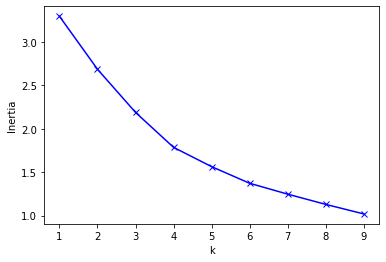

In [48]:
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.show()

We see that the optimal number of clusters is 4 (or 5) !!!

In [49]:
# set number of clusters
kclusters = 4

center_toronto_grouped_clustering = center_toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(init="k-means++", n_clusters=kclusters, n_init=100, random_state=0).fit(center_toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

Let us create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [50]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

center_toronto_merged = center_toronto

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
center_toronto_merged = center_toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

center_toronto_merged.head() # check the last columns!

Postal Code           Borough                                 Neighborhood  \
0         M5A  Downtown Toronto                    Regent Park, Harbourfront   
1         M7A  Downtown Toronto  Queen's Park, Ontario Provincial Government   
2         M5B  Downtown Toronto                     Garden District, Ryerson   
3         M5C  Downtown Toronto                               St. James Town   
4         M4E      East Toronto                                  The Beaches   

    Latitude  Longitude  Cluster Labels 1st Most Common Venue  \
0  43.654260 -79.360636               1           Coffee Shop   
1  43.662301 -79.389494               1           Coffee Shop   
2  43.657162 -79.378937               1        Clothing Store   
3  43.651494 -79.375418               1           Coffee Shop   
4  43.676357 -79.293031               1     Health Food Store   

  2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
0                Bakery                   Pub                  Park   
1      Sushi Restaurant                 Diner   Arts & Crafts Store   
2           Coffee Shop        Cosmetics Shop                  Café   
3                  Café   American Restaurant             Gastropub   
4                 Trail                   Pub         Women's Store   

       5th Most Common Venue 6th Most Common Venue  \
0             Breakfast Spot                  Café   
1              Burrito Place   Distribution Center   
2  Middle Eastern Restaurant       Bubble Tea Shop   
3               Cocktail Bar            Restaurant   
4               Dance Studio     Electronics Store   

         7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
0                      Theater           Yoga Studio        Cosmetics Shop   
1               Discount Store         Smoothie Shop                  Café   
2          Japanese Restaurant           Pizza Place  Fast Food Restaurant   
3                     Creperie        Cosmetics Shop        Clothing Store   
4  Eastern European Restaurant            Donut Shop      Doner Restaurant   

  10th Most Common Venue  
0             Shoe Store  
1               Beer Bar  
2     Italian Restaurant  
3         Lingerie Store  
4                Dog Run

Finally, we can visualize the resulting clusters on the Toronto map

In [51]:
# create map
map_toronto_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1.2, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(center_toronto_merged['Latitude'], center_toronto_merged['Longitude'], center_toronto_merged['Neighborhood'], center_toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
#         color=['red','orange','green','blue'],
        fill=True,
        fill_color=rainbow[cluster-1],
#         fill_color=['red','orange','green','blue'],
        fill_opacity=0.7).add_to(map_toronto_clusters)
       
map_toronto_clusters

------------------

<a id='item5'></a>

## 5. Examine Clusters

Now, you can examine each cluster and determine the discriminating venue categories that distinguish each cluster.

### Cluster 1 - Parks

In [52]:
center_toronto_merged.loc[center_toronto_merged['Cluster Labels'] == 0, center_toronto_merged.columns[[1] + list(range(5, center_toronto_merged.shape[1]))]]

Borough  Cluster Labels 1st Most Common Venue  \
18   Central Toronto               0                  Park   
21   Central Toronto               0                  Park   
33  Downtown Toronto               0                  Park   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
18           Swim School              Bus Line    Falafel Restaurant   
21         Jewelry Store                 Trail      Sushi Restaurant   
33            Playground                 Trail          Cupcake Shop   

   5th Most Common Venue        6th Most Common Venue  \
18  Ethiopian Restaurant            Electronics Store   
21          Dance Studio            Electronics Store   
33     Electronics Store  Eastern European Restaurant   

          7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
18  Eastern European Restaurant            Donut Shop      Doner Restaurant   
21  Eastern European Restaurant            Donut Shop      Doner Restaurant   
33                   Donut Shop      Doner Restaurant               Dog Run   

   10th Most Common Venue  
18                Dog Run  
21                Dog Run  
33    Distribution Center

### Cluster 2 - Coffee and Food

In [53]:
center_toronto_merged.loc[center_toronto_merged['Cluster Labels'] == 1, center_toronto_merged.columns[[1] + list(range(5, center_toronto_merged.shape[1]))]]

Borough  Cluster Labels 1st Most Common Venue  \
0   Downtown Toronto               1           Coffee Shop   
1   Downtown Toronto               1           Coffee Shop   
2   Downtown Toronto               1        Clothing Store   
3   Downtown Toronto               1           Coffee Shop   
4       East Toronto               1     Health Food Store   
5   Downtown Toronto               1           Coffee Shop   
6   Downtown Toronto               1           Coffee Shop   
7   Downtown Toronto               1         Grocery Store   
8   Downtown Toronto               1           Coffee Shop   
9       West Toronto               1              Pharmacy   
10  Downtown Toronto               1           Coffee Shop   
11      West Toronto               1                   Bar   
12      East Toronto               1      Greek Restaurant   
13  Downtown Toronto               1           Coffee Shop   
14      West Toronto               1                  Café   
15      East Toronto               1                  Park   
16  Downtown Toronto               1           Coffee Shop   
17      East Toronto               1                  Café   
20   Central Toronto               1                  Park   
22      West Toronto               1    Mexican Restaurant   
23   Central Toronto               1        Clothing Store   
24   Central Toronto               1           Coffee Shop   
25      West Toronto               1             Gift Shop   
26   Central Toronto               1           Pizza Place   
27  Downtown Toronto               1                  Café   
28      West Toronto               1           Coffee Shop   
30  Downtown Toronto               1                  Café   
31   Central Toronto               1                   Pub   
32  Downtown Toronto               1       Airport Service   
34  Downtown Toronto               1           Coffee Shop   
35  Downtown Toronto               1           Coffee Shop   
36  Downtown Toronto               1           Coffee Shop   
37  Downtown Toronto               1           Coffee Shop   
38      East Toronto               1           Yoga Studio   

   2nd Most Common Venue  3rd Most Common Venue  \
0                 Bakery                    Pub   
1       Sushi Restaurant                  Diner   
2            Coffee Shop         Cosmetics Shop   
3                   Café    American Restaurant   
4                  Trail                    Pub   
5           Cocktail Bar                   Café   
6     Italian Restaurant         Sandwich Place   
7                   Café                   Park   
8             Restaurant                   Café   
9                 Bakery          Grocery Store   
10              Aquarium                  Hotel   
11            Restaurant  Vietnamese Restaurant   
12           Coffee Shop     Italian Restaurant   
13                 Hotel                   Café   
14                Bakery         Breakfast Spot   
15        Sandwich Place   Fast Food Restaurant   
16                  Café             Restaurant   
17           Coffee Shop              Gastropub   
20                   Gym         Breakfast Spot   
22                  Café        Thai Restaurant   
23           Coffee Shop          Grocery Store   
24                  Café         Sandwich Place   
25        Breakfast Spot              Bookstore   
26          Dessert Shop         Sandwich Place   
27                Bakery              Bookstore   
28      Sushi Restaurant                   Café   
30    Mexican Restaurant  Vietnamese Restaurant   
31           Coffee Shop    Fried Chicken Joint   
32        Airport Lounge       Airport Terminal   
34    Seafood Restaurant                   Café   
35           Pizza Place             Restaurant   
36                  Café             Restaurant   
37      Sushi Restaurant    Japanese Restaurant   
38         Auto Workshop             Skate Park   

            4th Most Common Venue      5th Most Common V

### Cluster 3 - Garden, Music and Dance, Women's Store

In [54]:
center_toronto_merged.loc[center_toronto_merged['Cluster Labels'] == 2, center_toronto_merged.columns[[1] + list(range(5, center_toronto_merged.shape[1]))]]

Borough  Cluster Labels 1st Most Common Venue  \
19  Central Toronto               2                Garden   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
19           Music Venue         Women's Store          Dance Studio   

   5th Most Common Venue        6th Most Common Venue 7th Most Common Venue  \
19     Electronics Store  Eastern European Restaurant            Donut Shop   

   8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
19      Doner Restaurant               Dog Run    Distribution Center

### Cluster 4 - Gym, Trail, Women's Store

In [55]:
center_toronto_merged.loc[center_toronto_merged['Cluster Labels'] == 3, center_toronto_merged.columns[[1] + list(range(5, center_toronto_merged.shape[1]))]]

Borough  Cluster Labels 1st Most Common Venue  \
29  Central Toronto               3                   Gym   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
29                 Trail         Women's Store          Dance Studio   

   5th Most Common Venue 6th Most Common Venue        7th Most Common Venue  \
29  Ethiopian Restaurant     Electronics Store  Eastern European Restaurant   

   8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
29            Donut Shop      Doner Restaurant                Dog Run

---------------------
---------------------

<a id='item6'></a>

## 6. Conclusions

The clustering was also tested using *k*-values equal to 20, 10, 6, 5, and 3. Variations were not significative. Following the elbow method, we considered a *k*-value of 4 as final value. We can see that cluster 1 is over represented and the other clusters only have few points. This means that in most of the neighborhoods of the "city center" of Toronto there are similar venues around namely coffee shops, restaurants or other places where one can buy drinks or food.

--------------
--------------

<a id='item7'></a>

## 7. Appendices

### Code to extract data using BeautifulSoup

In [58]:
import pandas as pd
import numpy as np
import requests

from bs4 import BeautifulSoup


source = requests.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M').text

soup = BeautifulSoup(source, 'html5lib')

postal_codes_dict = {} # initialize an empty dictionary to save the data in
for table_cell in soup.find_all('td'):
    try:
        postal_code = table_cell.p.b.text # get the postal code
        postal_code_investigate = table_cell.span.text
        neighborhoods_data = table_cell.span.text # get the rest of the data in the cell
        borough = neighborhoods_data.split('(')[0] # get the borough in the cell
        
        # if the cell is not assigned then ignore it
        if neighborhoods_data == 'Not assigned':
            neighborhoods = []
        # else process the data and add it to the dictionary
        else:
            postal_codes_dict[postal_code] = {}
            
            try:
                neighborhoods = neighborhoods_data.split('(')[1]
            
                # remove parantheses from neighborhoods string
                neighborhoods = neighborhoods.replace('(', ' ')
                neighborhoods = neighborhoods.replace(')', ' ')

                neighborhoods_names = neighborhoods.split('/')
                neighborhoods_clean = ', '.join([name.strip() for name in neighborhoods_names])
            except:
                borough = borough.strip('\n')
                neighborhoods_clean = borough
 
            # add borough and neighborhood to dictionary
            postal_codes_dict[postal_code]['borough'] = borough
            postal_codes_dict[postal_code]['neighborhoods'] = neighborhoods_clean
    except:
        pass
    
# create an empty dataframe
columns = ['PostalCode', 'Borough', 'Neighborhood']
toronto_data = pd.DataFrame(columns=columns)
toronto_data

# populate dataframe with data from dictionary
for ind, postal_code in enumerate(postal_codes_dict):
    borough = postal_codes_dict[postal_code]['borough']
    neighborhood = postal_codes_dict[postal_code]['neighborhoods']
    toronto_data = toronto_data.append({"PostalCode": postal_code, 
                                        "Borough": borough, 
                                        "Neighborhood": neighborhood},
                                        ignore_index=True)

# print number of rows of dataframe
toronto_data.shape[0]

0

In [59]:
toronto_data.head(10)

Empty DataFrame
Columns: [PostalCode, Borough, Neighborhood]
Index: []